## Exercise #1

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos = pd.read_csv("drive/My Drive/Colab Notebooks/Jugadores.csv",header=0, delimiter=',')

In [ ]:
datos.head()

,Numero de Jugador,Jugador,Pais,Posicion,Posicion Num,Edad,Partidos Jugados,Titular,Minutos,Goles,...,Goles Sin Penalizacion,Penales Acertados,Total Penales,Tarjetas Amarillas,Tarjetas Rojas,Goles Esperados,Goles Esperados Sin Penalidad,Goles Asistidos Esperados,Equipo,Label
0,0.495770,Cristiano Ronaldo,POR,DLCC,43,29,35,35,3100,48,...,38,10,12.0,5,1,NaN,NaN,NaN,Real Madrid,1
1,0.573662,Djené,TOG,DF,2,29,35,35,3115,0,...,0,0,0.0,11,1,0.0,0.01,0.01,Getafe,0
2,0.647619,Rodrigo,ESP,DL,4,21,21,10,881,1,...,1,0,0.0,1,0,1.3,1.30,1.60,Betis,0
3,0.404662,Allan Nyom,CMR,DF,2,33,5,3,244,0,...,0,0,0.0,1,0,0.0,0.04,0.04,Getafe,0
4,0.686364,Javier Ontiveros,ESP,CCDL,34,23,3,0,39,0,...,0,0,0.0,0,0,0.1,0.10,0.00,Osasuna,0


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Numero de Jugador              1000 non-null   float64
 1   Jugador                        1000 non-null   object 
 2   Pais                           1000 non-null   object 
 3   Posicion                       1000 non-null   object 
 4   Posicion Num                   1000 non-null   int64  
 5   Edad                           1000 non-null   int64  
 6   Partidos Jugados               1000 non-null   int64  
 7   Titular                        1000 non-null   int64  
 8   Minutos                        1000 non-null   int64  
 9   Goles                          1000 non-null   int64  
 10  Asistencias                    995 non-null    float64
 11  Goles Sin Penalizacion         1000 non-null   int64  
 12  Penales Acertados              1000 non-null   in

In [ ]:
data = datos.drop(columns=['Numero de Jugador','Jugador','Pais','Posicion','Titular','Minutos','Goles Sin Penalizacion','Total Penales','Goles Esperados Sin Penalidad','Goles Asistidos Esperados','Equipo'])

In [ ]:
data.head()

,Posicion Num,Edad,Partidos Jugados,Goles,Asistencias,Penales Acertados,Tarjetas Amarillas,Tarjetas Rojas,Goles Esperados,Label
0,43,29,35,48,16.0,10,5,1,NaN,1
1,2,29,35,0,1.0,0,11,1,0.0,0
2,4,21,21,1,2.0,0,1,0,1.3,0
3,2,33,5,0,0.0,0,1,0,0.0,0
4,34,23,3,0,0.0,0,0,0,0.1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Numero de Jugador              1000 non-null   float64
 1   Jugador                        1000 non-null   object 
 2   Pais                           1000 non-null   object 
 3   Posicion                       1000 non-null   object 
 4   Posicion Num                   1000 non-null   int64  
 5   Edad                           1000 non-null   int64  
 6   Partidos Jugados               1000 non-null   int64  
 7   Titular                        1000 non-null   int64  
 8   Minutos                        1000 non-null   int64  
 9   Goles                          1000 non-null   int64  
 10  Asistencias                    995 non-null    float64
 11  Goles Sin Penalizacion         1000 non-null   int64  
 12  Penales Acertados              1000 non-null   in

In [ ]:
X = data.drop(columns=["Label"]).values
y = data['Label']

In [ ]:
# Calcular la media ignorando NaN y reemplazar NaN con la media
mean_values = np.nanmean(X, axis=0)  # Media por columna, ignorando NaN
indices_nan = np.where(np.isnan(X))  # Encontrar índices de NaN
X[indices_nan] = np.take(mean_values, indices_nan[1])  # Reemplazar NaN


In [ ]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos para normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential(
    [

      Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Primera capa oculta
      Dense(32, activation='relu'),  # Segunda capa oculta
      Dense(1, activation='sigmoid')
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, verbose=1)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5082 - loss: 0.6991 - val_accuracy: 0.6250 - val_loss: 0.6503
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6791 - loss: 0.6125 - val_accuracy: 0.7250 - val_loss: 0.6103
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7445 - loss: 0.5691 - val_accuracy: 0.7550 - val_loss: 0.5658
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7921 - loss: 0.5178 - val_accuracy: 0.7850 - val_loss: 0.5196
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8218 - loss: 0.4606 - val_accuracy: 0.8200 - val_loss: 0.4748
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8495 - loss: 0.4141 - val_accuracy: 0.8500 - val_loss: 0.4503
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8884 - loss: 0.3499 - val_accuracy: 0.8200 - val_loss: 0.4296
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8709 - loss: 0.3575 - val_accuracy: 0.8800 - val_loss:

In [ ]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")

Precisión en el conjunto de prueba: 0.84


In [ ]:
# Guardar el modelo en un archivo .h5
model.save("modelo_real_madrid.h5")

In [ ]:
# Descargar el modelo
from google.colab import files
files.download("modelo_real_madrid.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Exercise #2

In [ ]:
# Ruta al archivo del modelo guardado en tu Google Drive
modelo_path = "drive/My Drive/Colab Notebooks/modelo_real_madrid.h5"

# Cargar el modelo
modelo = load_model(modelo_path)

# Datos de los nuevos jugadores
jugadores = [
    [2, 28, 30, 1, 0, 0, 9, 1, 1.7],  # Harry Maguire
    [4, 33, 32, 27, 12, 7, 0, 0, 23.5],  # Karim Benzema
    [4, 32, 34, 35, 3, 5, 2, 0, 32],  # Robert Lewandowski
    [2, 31, 18, 0, 0, 0, 4, 1, 0.5],  # Ximo Navarro
]

# Convertir a matriz numpy
jugadores = np.array(jugadores)

# Escalar los datos de los jugadores con el scaler usado durante el entrenamiento
jugadores_escalados = scaler.transform(jugadores)

# Realizar predicciones
predicciones = modelo.predict(jugadores_escalados)

# Nombres de los jugadores
jugadores_nombres = ["Harry Maguire", "Karim Benzema", "Robert Lewandowski", "Ximo Navarro"]

# Mostrar resultados
print("Predicciones:")
for jugador, prediccion in zip(jugadores_nombres, predicciones):
    print(f"{jugador}: Probabilidad de estar en el Real Madrid: {prediccion[0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicciones:
Harry Maguire: Probabilidad de estar en el Real Madrid: 0.84
Karim Benzema: Probabilidad de estar en el Real Madrid: 0.99
Robert Lewandowski: Probabilidad de estar en el Real Madrid: 0.02
Ximo Navarro: Probabilidad de estar en el Real Madrid: 0.01


# Exercise #3

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Preprocesamiento de datos
# Cambiar la forma del dataset a 4 dimensiones (necesario para CNN)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [ ]:
# Normalizar los datos (dividir por 255 para que los valores estén entre 0 y 1)
x_train /= 255
x_test /= 255

# Convertir las etiquetas a formato categórico
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Crear el modelo CNN
model = Sequential()

In [ ]:
# Primera capa convolucional
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda capa convolucional
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanar las capas
model.add(Flatten())

# Añadir capas densas
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularización para evitar sobreajuste
model.add(Dense(10, activation='softmax'))  # 10 clases para los números del 0 al 9

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128, verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 65s 132ms/step - accuracy: 0.9927 - loss: 0.0240 - val_accuracy: 0.9901 - val_loss: 0.0278
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 123ms/step - accuracy: 0.9943 - loss: 0.0176 - val_accuracy: 0.9926 - val_loss: 0.0223
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 127ms/step - accuracy: 0.9935 - loss: 0.0204 - val_accuracy: 0.9905 - val_loss: 0.0286
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 123ms/step - accuracy: 0.9954 - loss: 0.0147 - val_accuracy: 0.9930 - val_loss: 0.0215
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 125ms/step - accuracy: 0.9949 - loss: 0.0151 - val_accuracy: 0.9927 - val_loss: 0.0233
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 128ms/step - accuracy: 0.9955 - loss: 0.0132 - val_accuracy: 0.9929 - val_loss: 0.0254
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 130ms/step - accuracy: 0.9967 - loss: 0.0110 - val_accuracy: 0.9929 - val_loss: 0.0240
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 127ms/step - accuracy: 0.9975 - loss: 0

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy en test: {test_accuracy:.4f}")

Accuracy en test: 0.9925


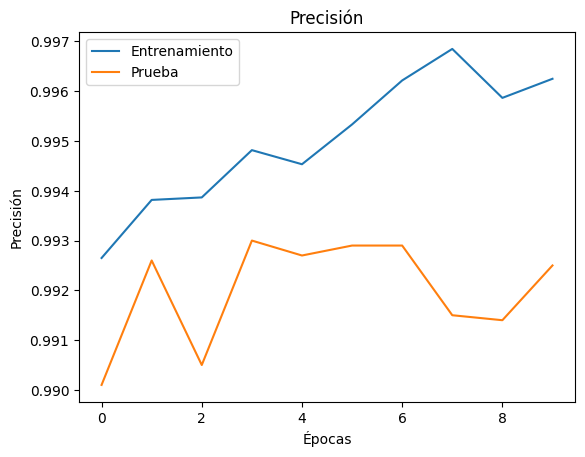

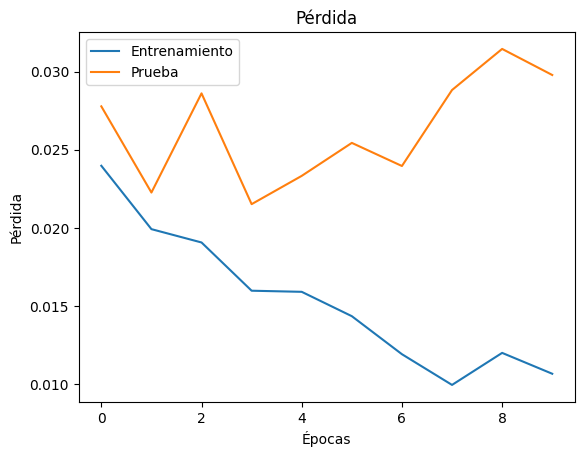

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de precisión
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Prueba')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Gráfico de pérdida
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Prueba')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


In [ ]:
# Guardar el modelo
model.save("mnist_cnn_model.h5")
print("Modelo guardado como 'mnist_cnn_model.h5'")

Modelo guardado como 'mnist_cnn_model.h5'


In [ ]:
# Descargar el modelo
from google.colab import files
files.download("mnist_cnn_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
modelo_path = "drive/My Drive/Colab Notebooks/mnist_cnn_model.h5"

# Cargar el modelo
modelo = load_model(modelo_path)


In [ ]:
# Normalizar los datos de las imágenes
x_test = x_test / 255.0  # Normalización de las imágenes

# Reshape de las imágenes para que tengan la forma adecuada para la red CNN (28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [ ]:
# Hacer predicciones con las imágenes especificadas
predicciones = modelo.predict(x_test)

# Indexar las imágenes especificadas
imagens_a_predecir = [x_test[1], x_test[12], x_test[200]]

# Predicciones para cada imagen
resultados = [np.argmax(predicciones[i]) for i in [1, 12, 200]]

# Mostrar los resultados
for idx, resultado in zip([1, 12, 200], resultados):
    print(f"Imagen en el índice {idx}: Predicción = {resultado}, Esperado = {idx}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
Imagen en el índice 1: Predicción = 1, Esperado = 1
Imagen en el índice 12: Predicción = 1, Esperado = 12
Imagen en el índice 200: Predicción = 1, Esperado = 200
